# Notebook for simulating an average down stock/etf trading strategy

#### Disclaimer: The author of this code/analysis is not resposible for those who risk their money trying this strategy. There is inherent risk to participating in the stock market despite this technical analysis. As a general rule, one should only trade/invest with money that one can afford to lose. 
#### Author: Evan Tsiklidis

# Premise: Average down on blue chip stocks and compare with the hold strategy. Code is meant to answer the following questions. 
#### 1. When should we average down?
#### 2. How much should we purchase when we average down? 


# Risks: 
#### 1. This strategy is based on the assumption that blue-chip stocks will not monotonically decline. Generally speaking, stocks will drop but may also increase in value briefly as traders/investers attempt to "buy-the-dip". However, there is requirement guaranteeing this will happen: just what tends to happen to stocks in the market. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import date, timedelta
from trading_strats import StockEvaluations
from tqdm import tqdm
import os
from ydata_profiling import ProfileReport
import seaborn as sns

In [2]:
stock = StockEvaluations(ticker='TSLA',num_days=365,num_chunks=5,percent_cutoff=-2)
stock.getStockData()
stock.simulateAvgDownStrat()

['TSLA', 365, 5, -2, 5.09, -11.06]

In [3]:
stock = StockEvaluations(ticker='AMZN',num_days=365,num_chunks=5,percent_cutoff=-2)
stock.getStockData()
stock.simulateAvgDownStrat()

['AMZN', 365, 5, -2, 15.76, 13.48]

In [4]:
stock = StockEvaluations(ticker='BBBYQ',num_days=365,num_chunks=5,percent_cutoff=-5)
stock.getStockData()
stock.simulateAvgDownStrat()

['BBBYQ', 365, 5, -5, -97.32, -98.5]

In [5]:
stock = StockEvaluations(ticker='PFE',num_days=365,num_chunks=5,percent_cutoff=-5)
stock.getStockData()
stock.simulateAvgDownStrat()

['PFE', 365, 5, -5, -5.17, -25.84]

In [6]:
if 'stockStratData.csv' in os.listdir(os.getcwd()+'/sim_results'): 
    df = pd.read_csv(os.getcwd() + '/sim_results/stockStratData.csv').drop(['Unnamed: 0'],axis=1)
else: 
    #Main simulator, used for generating data that will be evaluated below. 
    stock_list = ['AMZN','TSLA','QQQ','MRK','BAC','CAT','CVX','GM','JPM','KO','MRK','AAPL']
    num_days_list = [i * 360 for i in range(1,10)]
    num_chunks_list = [i for i in range(1,10)]
    percent_cutoff_list = [-5,-4,-3,-2,-1]

    data = []

    for ticker in tqdm(stock_list): 
        for num_days in num_days_list: 
            for num_chunks in num_chunks_list: 
                for percent_cutoff in percent_cutoff_list: 

                    stock = StockEvaluations(ticker=ticker,num_days=num_days,num_chunks=num_chunks,percent_cutoff=percent_cutoff)
                    stock.getStockData()
                    results = stock.simulateAvgDownStrat()       
                    data.append(results)
    df = pd.DataFrame(data,columns = ['Ticker','Num_Days','Num_Chunks','Cutoff','Strategy','Buy_and_hold'])
df.head()

Ticker  Num_Days  Num_Chunks  Cutoff  Strategy  Buy_and_hold
0   AMZN       360           1      -5     21.56         21.56
1   AMZN       360           1      -4     21.56         21.56
2   AMZN       360           1      -3     21.56         21.56
3   AMZN       360           1      -2     21.56         21.56
4   AMZN       360           1      -1     21.56         21.56

In [77]:
df.describe()

Num_Days   Num_Chunks       Cutoff     Strategy  Buy_and_hold
count  4860.000000  4860.000000  4860.000000  4860.000000   4860.000000
mean   1800.000000     5.000000    -3.000000    57.563288    170.792222
std     929.611647     2.582255     1.414359   156.596193    362.056558
min     360.000000     1.000000    -5.000000   -37.010000    -37.010000
25%    1080.000000     3.000000    -4.000000     8.320000     20.827500
50%    1800.000000     5.000000    -3.000000    16.680000     51.665000
75%    2520.000000     7.000000    -2.000000    38.910000    119.437500
max    3240.000000     9.000000    -1.000000  1866.590000   1866.590000

## Data Analysis from all in-silico experimentation of our strategy will be contined below.

In [7]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
#Group and aggregate mean results. 
grouped_df = df[['Num_Chunks','Cutoff','Strategy']].groupby(['Num_Chunks','Cutoff']).mean().reset_index()
grouped_df['Cutoff'] = grouped_df['Cutoff'].astype(str)
grouped_df.head(10)

Num_Chunks Cutoff    Strategy
0           1     -5  170.792222
1           1     -4  170.792222
2           1     -3  170.792222
3           1     -2  170.792222
4           1     -1  170.792222
5           2     -5   90.157963
6           2     -4   90.746574
7           2     -3   91.271111
8           2     -2   92.720093
9           2     -1   93.295278

In [40]:
#Construct pivot table
pivot_df = pd.pivot_table(grouped_df, index=["Num_Chunks"], columns=["Cutoff"])
pivot_df.columns = ["Cutoff = ".join((j)) for j in pivot_df.columns]
pivot_df.columns = [j.replace('Strategy','') for j in pivot_df.columns]
pivot_df

Cutoff = -1  Cutoff = -2  Cutoff = -3  Cutoff = -4  Cutoff = -5
Num_Chunks                                                                 
1            170.792222   170.792222   170.792222   170.792222   170.792222
2             93.295278    92.720093    91.271111    90.746574    90.157963
3             63.839352    63.700093    62.646481    61.342130    60.352500
4             49.919907    48.886481    47.912963    47.196204    46.000926
5             40.468426    39.645093    38.853241    37.698981    36.863056
6             33.833426    33.185648    32.396481    31.537963    30.734444
7             29.172315    28.553889    27.841019    27.045648    26.321574
8             26.051759    25.498796    24.439630    23.820926    23.086574
9             23.162037    22.759259    21.755185    21.185370    20.488056

Text(50.722222222222214, 0.5, 'Number of Chunks')

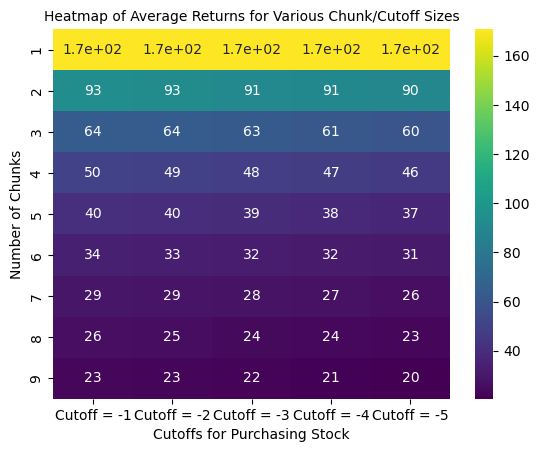

In [45]:
sns.heatmap(pivot_df, annot=True,cmap='viridis')

plt.title('Heatmap of Average Returns for Various Chunk/Cutoff Sizes', fontsize = 10) # title with fontsize 20
plt.xlabel('Cutoffs for Purchasing Stock', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('Number of Chunks', fontsize = 10) # y-axis label with fontsize 15


## Let's take a closer look at situations where the average down strategy wins

In [64]:
stratWins = df[df['Strategy'] > df['Buy_and_hold']]
stratWins.head()

Ticker  Num_Days  Num_Chunks  Cutoff  Strategy  Buy_and_hold
5    AMZN       360           2      -5     23.42         21.56
6    AMZN       360           2      -4     23.42         21.56
7    AMZN       360           2      -3     21.90         21.56
8    AMZN       360           2      -2     22.99         21.56
50   AMZN       720           2      -5     20.33        -15.19

In [78]:
stratWins.describe()

Num_Days  Num_Chunks      Cutoff    Strategy  Buy_and_hold
count   775.000000  775.000000  775.000000  775.000000    775.000000
mean   1329.909677    5.326452   -2.938065    8.257058     -6.186232
std     867.508754    2.297175    1.405520    9.945009     13.599023
min     360.000000    2.000000   -5.000000  -34.370000    -37.010000
25%     720.000000    3.000000   -4.000000    3.825000    -12.490000
50%    1080.000000    5.000000   -3.000000    8.470000     -3.890000
75%    1800.000000    7.000000   -2.000000   13.285000      3.170000
max    3240.000000    9.000000   -1.000000   52.090000     43.000000

In [76]:
stratWins.Cutoff.value_counts()

-1    162
-3    161
-2    160
-4    148
-5    144
Name: Cutoff, dtype: int64

In [70]:
profile = ProfileReport(stratWins, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
#Group results based on mean
grouped_df = df[['Num_Chunks','Cutoff','Strategy']].groupby(['Num_Chunks','Cutoff']).mean().reset_index()
grouped_df['Cutoff'] = grouped_df['Cutoff'].astype(str)
grouped_df.head(10)

Num_Chunks Cutoff    Strategy
0           1     -5  170.792222
1           1     -4  170.792222
2           1     -3  170.792222
3           1     -2  170.792222
4           1     -1  170.792222
5           2     -5   90.157963
6           2     -4   90.746574
7           2     -3   91.271111
8           2     -2   92.720093
9           2     -1   93.295278

In [72]:
#Construct pivot table
pivot_df = pd.pivot_table(grouped_df, index=["Num_Chunks"], columns=["Cutoff"])
pivot_df.columns = ["Cutoff = ".join((j)) for j in pivot_df.columns]
pivot_df.columns = [j.replace('Strategy','') for j in pivot_df.columns]
pivot_df

Cutoff = -1  Cutoff = -2  Cutoff = -3  Cutoff = -4  Cutoff = -5
Num_Chunks                                                                 
1            170.792222   170.792222   170.792222   170.792222   170.792222
2             93.295278    92.720093    91.271111    90.746574    90.157963
3             63.839352    63.700093    62.646481    61.342130    60.352500
4             49.919907    48.886481    47.912963    47.196204    46.000926
5             40.468426    39.645093    38.853241    37.698981    36.863056
6             33.833426    33.185648    32.396481    31.537963    30.734444
7             29.172315    28.553889    27.841019    27.045648    26.321574
8             26.051759    25.498796    24.439630    23.820926    23.086574
9             23.162037    22.759259    21.755185    21.185370    20.488056

Text(50.722222222222214, 0.5, 'Number of Chunks')

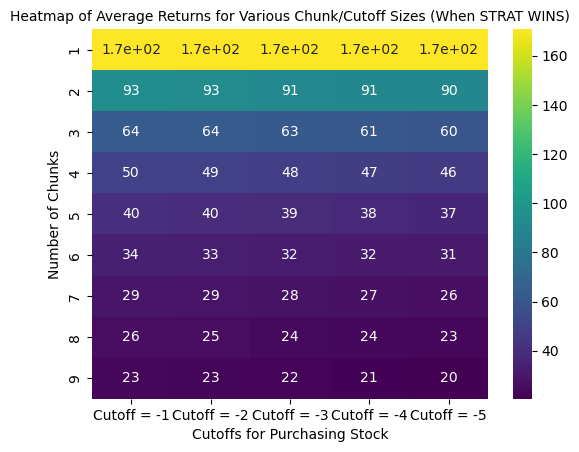

In [73]:
sns.heatmap(pivot_df, annot=True,cmap='viridis')

plt.title('Heatmap of Average Returns for Various Chunk/Cutoff Sizes (When STRAT WINS)', fontsize = 10) # title with fontsize 20
plt.xlabel('Cutoffs for Purchasing Stock', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('Number of Chunks', fontsize = 10) # y-axis label with fontsize 15


## Summary: More work to be done here, but this simple strategy does not beat the market. An interesting next step in the analysis would involve applying this strategy to scan the entire market for blue chip stocks that have experienced a ~3–5% decline, instead of limiting the focus to just one stock per day.